In [1]:
"""Example showing different sampling strategies"""

# Copyright (c) 2024 Alliance for Sustainable Energy, LLC

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

__authors__ = ["Weslley S. Pereira"]
__contact__ = "weslley.dasilvapereira@nrel.gov"
__maintainer__ = "Weslley S. Pereira"
__email__ = "weslley.dasilvapereira@nrel.gov"
__credits__ = ["Weslley S. Pereira"]
__version__ = "0.5.2"
__deprecated__ = False

In [2]:
from blackboxopt.sampling import NormalSampler, Sampler, SamplingStrategy, Mitchel91Sampler
import numpy as np


def scatter_hist(x, y, ax, ax_histx, ax_histy, current_sample=None, iindex=()):
    """From: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html"""
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)
    if current_sample is not None:
        ax.scatter(current_sample[:, 0], current_sample[:, 1], marker='x')

    # now determine nice limits by hand for x:
    binwidth = 0.05 if 0 not in iindex else 0.5
    xmax = np.max(np.abs(x))
    lim = (int(xmax / binwidth) + 1) * binwidth
    xbins = np.arange(-lim, lim + binwidth, binwidth)

    # now determine nice limits by hand for y:
    binwidth = 0.05 if 1 not in iindex else 0.5
    ymax = np.max(np.abs(y))
    lim = (int(ymax / binwidth) + 1) * binwidth
    ybins = np.arange(-lim, lim + binwidth, binwidth)

    ax_histx.hist(x, bins=xbins)
    ax_histy.hist(y, bins=ybins, orientation="horizontal")


def plot_sample_2d(sample, bounds, current_sample=None, iindex=()):
    """Adapted from: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html"""
    import matplotlib.pyplot as plt

    # Create a Figure, which doesn't have to be square.
    fig = plt.figure(layout="constrained")

    # Create the main axes, leaving 25% of the figure space at the top and on the
    # right to position marginals.
    ax = fig.add_gridspec(top=0.75, right=0.75).subplots()

    # The main axes' aspect can be fixed.
    ax.set(aspect=1)

    # Create marginal axes, which have 25% of the size of the main axes.  Note that
    # the inset axes are positioned *outside* (on the right and the top) of the
    # main axes, by specifying axes coordinates greater than 1.  Axes coordinates
    # less than 0 would likewise specify positions on the left and the bottom of
    # the main axes.
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)

    # Draw the scatter plot and marginals.
    scatter_hist(sample[:, 0], sample[:, 1], ax, ax_histx, ax_histy, current_sample, iindex)

    ax.set_xlim(bounds[0])
    ax.set_ylim(bounds[1])
    plt.show()

In [3]:
m = 1000
dim = 2
bounds = [(0, 1)] * dim
lb = np.array([b[0] for b in bounds])
ub = np.array([b[1] for b in bounds])

Sampling 1000 points using a random uniform distribution


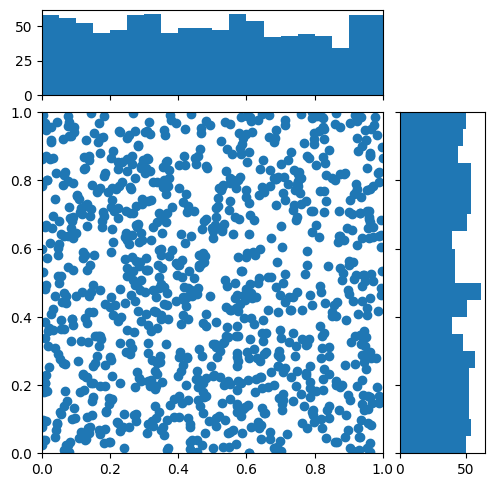

In [4]:
print("Sampling", m, "points using a random uniform distribution")
sample = Sampler(m).get_uniform_sample(bounds)
plot_sample_2d(sample, bounds)

Sampling 1000 points using SLHD


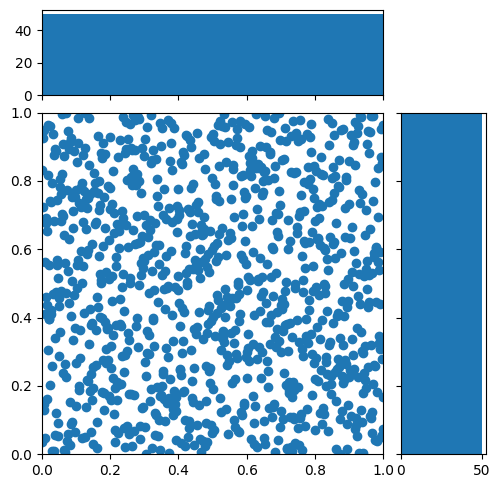

In [5]:
print("Sampling", m, "points using SLHD")
sample = Sampler(m).get_slhd_sample(bounds)
plot_sample_2d(sample, bounds)

Sampling 1000 points using a normal distribution with sigma 0.1 and mu [0.5 0.5]


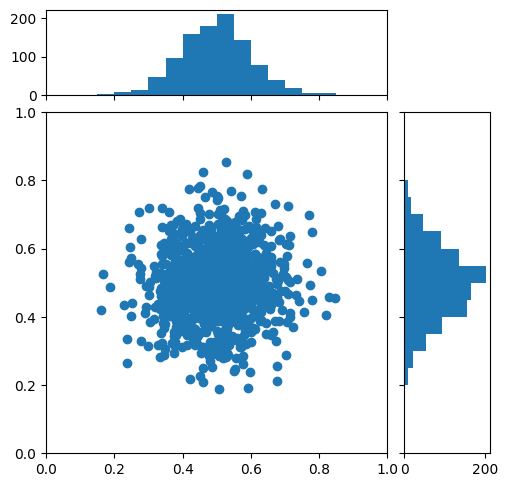

Sampling 1000 points using a normal distribution with sigma 0.1 and mu (0.1, 0.3)


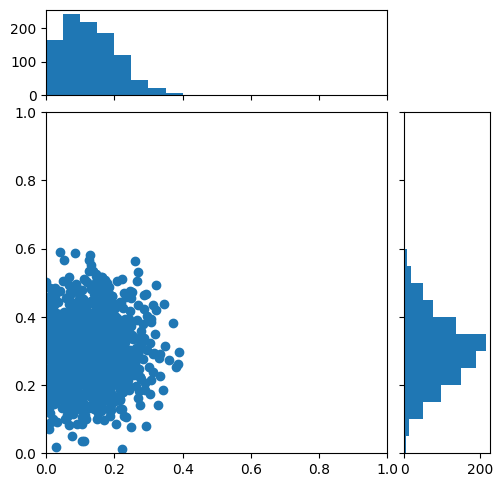

In [6]:
sigma = 0.1
mu = lb + (ub - lb) / 2
print(
    "Sampling",
    m,
    "points using a normal distribution with sigma",
    sigma,
    "and mu",
    mu,
)
sample = NormalSampler(m, sigma).get_normal_sample(bounds, mu=mu)
plot_sample_2d(sample, bounds)

sigma = 0.1
mu = (0.1, 0.3)
print(
    "Sampling",
    m,
    "points using a normal distribution with sigma",
    sigma,
    "and mu",
    mu,
)
sample = NormalSampler(m, sigma).get_normal_sample(bounds, mu=mu)
plot_sample_2d(sample, bounds)

Sampling 1000 points using a DDS distribution with sigma 0.1 mu [0.5 0.5] and perturbation probability 0.8


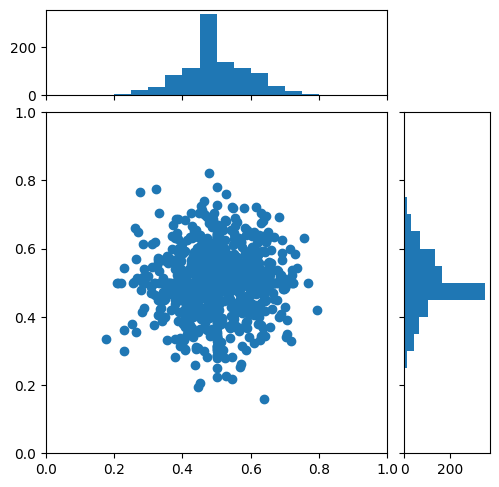

Sampling 1000 points using a DDS distribution with sigma 0.1 mu (0.1, 0.3) and perturbation probability 0.8


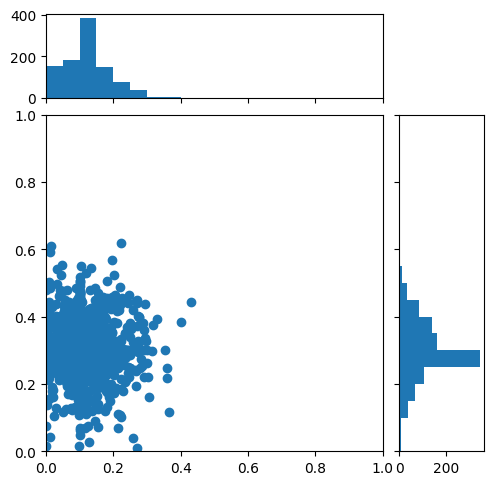

In [7]:
sigma = 0.1
mu = lb + (ub - lb) / 2
probability = 0.8
print(
    "Sampling",
    m,
    "points using a DDS distribution with sigma",
    sigma,
    "mu",
    mu,
    "and perturbation probability",
    probability,
)
sample = NormalSampler(m, sigma).get_dds_sample(
    bounds, mu=mu, probability=probability
)
plot_sample_2d(sample, bounds)

sigma = 0.1
mu = (0.1, 0.3)
probability = 0.8
print(
    "Sampling",
    m,
    "points using a DDS distribution with sigma",
    sigma,
    "mu",
    mu,
    "and perturbation probability",
    probability,
)
sample = NormalSampler(m, sigma).get_dds_sample(
    bounds, mu=mu, probability=probability
)
plot_sample_2d(sample, bounds)

Sampling 1000 points using a DDS-UNIFORM distribution with sigma 0.1 mu [0.5 0.5] and perturbation probability 0.8


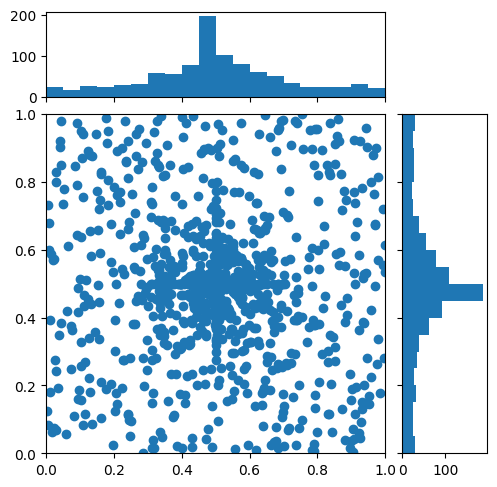

In [8]:
sigma = 0.1
mu = lb + (ub - lb) / 2
probability = 0.8
print(
    "Sampling",
    m,
    "points using a DDS-UNIFORM distribution with sigma",
    sigma,
    "mu",
    mu,
    "and perturbation probability",
    probability,
)
sample = NormalSampler(
    m, sigma, strategy=SamplingStrategy.DDS_UNIFORM
).get_sample(bounds, mu=mu, probability=probability)
plot_sample_2d(sample, bounds)

Sampling 1000 points using the strategy from Mitchel (1991) with maxCand= 10000 and scale=2


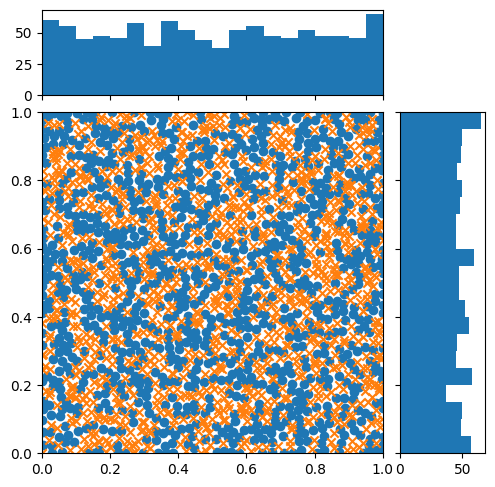

In [9]:
print(
    "Sampling",
    m,
    "points using the strategy from Mitchel (1991) with maxCand=",
    10*m,
    "and scale=2"
)
sampler = Mitchel91Sampler(m, maxCand=10*m, scale=2)
current = sampler.get_uniform_sample(bounds)
sample = sampler.get_sample(bounds, current_sample=current)
plot_sample_2d(sample, bounds, current_sample=current)

In [10]:
# Now, let's look at the mixed-integer sampling

m = 100
dim = 2
bounds = [(0, 10), (0,1)]
iindex = (0,)
lb = np.array([b[0] for b in bounds])
ub = np.array([b[1] for b in bounds])

Mixed-integer sampling 100 points using a random uniform distribution


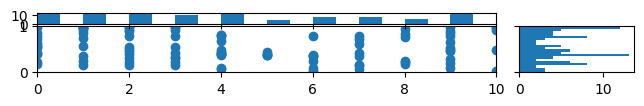

Number of points with x[ 0 ] ==  0 :  12
Number of points with x[ 0 ] ==  1 :  11
Number of points with x[ 0 ] ==  2 :  12
Number of points with x[ 0 ] ==  3 :  10
Number of points with x[ 0 ] ==  4 :  12
Number of points with x[ 0 ] ==  5 :  5
Number of points with x[ 0 ] ==  6 :  8
Number of points with x[ 0 ] ==  7 :  8
Number of points with x[ 0 ] ==  8 :  6
Number of points with x[ 0 ] ==  9 :  11
Number of points with x[ 0 ] ==  10 :  5


In [11]:
print("Mixed-integer sampling", m, "points using a random uniform distribution")
sample = Sampler(m).get_uniform_sample(bounds, iindex=iindex)
plot_sample_2d(sample, bounds, iindex=iindex)

for i in range(0,11):
    print(
        "Number of points with x[",
        iindex[0],
        "] == ",
        i,
        ": ",
        np.sum(sample[:,iindex[0]] == i)
        )

Mixed-integer sampling 100 points using SLHD


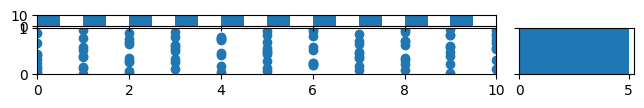

Number of points with x[ 0 ] ==  0 :  9
Number of points with x[ 0 ] ==  1 :  9
Number of points with x[ 0 ] ==  2 :  9
Number of points with x[ 0 ] ==  3 :  9
Number of points with x[ 0 ] ==  4 :  9
Number of points with x[ 0 ] ==  5 :  10
Number of points with x[ 0 ] ==  6 :  9
Number of points with x[ 0 ] ==  7 :  9
Number of points with x[ 0 ] ==  8 :  9
Number of points with x[ 0 ] ==  9 :  9
Number of points with x[ 0 ] ==  10 :  9


In [12]:
print("Mixed-integer sampling", m, "points using SLHD")
sample = Sampler(m).get_slhd_sample(bounds, iindex=iindex)
plot_sample_2d(sample, bounds, iindex=iindex)

for i in range(0,11):
    print(
        "Number of points with x[",
        iindex[0],
        "] == ",
        i,
        ": ",
        np.sum(sample[:,iindex[0]] == i)
        )

Mixed-integer sampling 100 points using a normal distribution with sigma 0.1 and mu [5.  0.5]


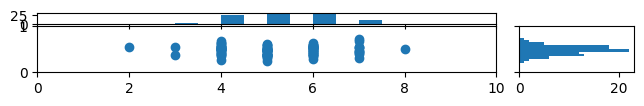

Number of points with x[ 0 ] ==  0 :  0
Number of points with x[ 0 ] ==  1 :  0
Number of points with x[ 0 ] ==  2 :  1
Number of points with x[ 0 ] ==  3 :  2
Number of points with x[ 0 ] ==  4 :  26
Number of points with x[ 0 ] ==  5 :  31
Number of points with x[ 0 ] ==  6 :  28
Number of points with x[ 0 ] ==  7 :  11
Number of points with x[ 0 ] ==  8 :  1
Number of points with x[ 0 ] ==  9 :  0
Number of points with x[ 0 ] ==  10 :  0
Mixed-integer sampling 100 points using a normal distribution with sigma 0.1 and mu (1, 0.3)


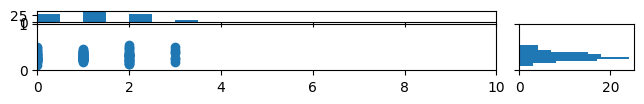

Number of points with x[ 0 ] ==  0 :  28
Number of points with x[ 0 ] ==  1 :  38
Number of points with x[ 0 ] ==  2 :  27
Number of points with x[ 0 ] ==  3 :  7
Number of points with x[ 0 ] ==  4 :  0
Number of points with x[ 0 ] ==  5 :  0
Number of points with x[ 0 ] ==  6 :  0
Number of points with x[ 0 ] ==  7 :  0
Number of points with x[ 0 ] ==  8 :  0
Number of points with x[ 0 ] ==  9 :  0
Number of points with x[ 0 ] ==  10 :  0


In [13]:
sigma = 0.1
mu = lb + (ub - lb) / 2
print(
    "Mixed-integer sampling",
    m,
    "points using a normal distribution with sigma",
    sigma,
    "and mu",
    mu,
)
sample = NormalSampler(m, sigma).get_normal_sample(
    bounds, mu=mu, iindex=iindex
)
plot_sample_2d(sample, bounds, iindex=iindex)

for i in range(0,11):
    print(
        "Number of points with x[",
        iindex[0],
        "] == ",
        i,
        ": ",
        np.sum(sample[:,iindex[0]] == i)
        )

sigma = 0.1
mu = (1, 0.3)
print(
    "Mixed-integer sampling",
    m,
    "points using a normal distribution with sigma",
    sigma,
    "and mu",
    mu,
)
sample = NormalSampler(m, sigma).get_normal_sample(
    bounds, mu=mu, iindex=iindex
)
plot_sample_2d(sample, bounds, iindex=iindex)

for i in range(0,11):
    print(
        "Number of points with x[",
        iindex[0],
        "] == ",
        i,
        ": ",
        np.sum(sample[:,iindex[0]] == i)
        )

Mixed-integer sampling 100 points using a DDS distribution with sigma 0.1 mu [5.  0.5] and perturbation probability 0.8


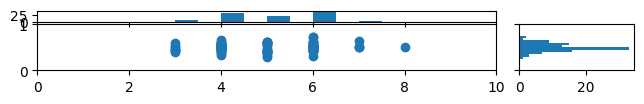

Number of points with x[ 0 ] ==  0 :  0
Number of points with x[ 0 ] ==  1 :  0
Number of points with x[ 0 ] ==  2 :  0
Number of points with x[ 0 ] ==  3 :  8
Number of points with x[ 0 ] ==  4 :  31
Number of points with x[ 0 ] ==  5 :  19
Number of points with x[ 0 ] ==  6 :  37
Number of points with x[ 0 ] ==  7 :  4
Number of points with x[ 0 ] ==  8 :  1
Number of points with x[ 0 ] ==  9 :  0
Number of points with x[ 0 ] ==  10 :  0
Mixed-integer sampling 100 points using a DDS distribution with sigma 0.1 mu (1, 0.3) and perturbation probability 0.8


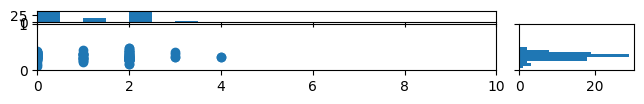

Number of points with x[ 0 ] ==  0 :  39
Number of points with x[ 0 ] ==  1 :  15
Number of points with x[ 0 ] ==  2 :  40
Number of points with x[ 0 ] ==  3 :  4
Number of points with x[ 0 ] ==  4 :  2
Number of points with x[ 0 ] ==  5 :  0
Number of points with x[ 0 ] ==  6 :  0
Number of points with x[ 0 ] ==  7 :  0
Number of points with x[ 0 ] ==  8 :  0
Number of points with x[ 0 ] ==  9 :  0
Number of points with x[ 0 ] ==  10 :  0


In [14]:
sigma = 0.1
mu = lb + (ub - lb) / 2
probability = 0.8
print(
    "Mixed-integer sampling",
    m,
    "points using a DDS distribution with sigma",
    sigma,
    "mu",
    mu,
    "and perturbation probability",
    probability,
)
sample = NormalSampler(m, sigma).get_dds_sample(
    bounds, mu=mu, probability=probability, iindex=iindex
)
plot_sample_2d(sample, bounds, iindex=iindex)

for i in range(0,11):
    print(
        "Number of points with x[",
        iindex[0],
        "] == ",
        i,
        ": ",
        np.sum(sample[:,iindex[0]] == i)
        )

sigma = 0.1
mu = (1,0.3)
probability = 0.8
print(
    "Mixed-integer sampling",
    m,
    "points using a DDS distribution with sigma",
    sigma,
    "mu",
    mu,
    "and perturbation probability",
    probability,
)
sample = NormalSampler(m, sigma).get_dds_sample(
    bounds, mu=mu, probability=probability, iindex=iindex
)
plot_sample_2d(sample, bounds, iindex=iindex)

for i in range(0,11):
    print(
        "Number of points with x[",
        iindex[0],
        "] == ",
        i,
        ": ",
        np.sum(sample[:,iindex[0]] == i)
        )

Mixed-integer sampling 50 points using the strategy from Mitchel (1991) with maxCand= 500 and scale=2


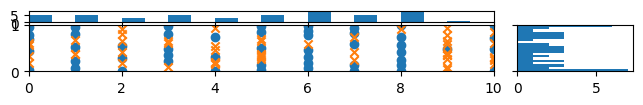

Number of points with x[ 0 ] ==  0 :  5
Number of points with x[ 0 ] ==  1 :  5
Number of points with x[ 0 ] ==  2 :  3
Number of points with x[ 0 ] ==  3 :  5
Number of points with x[ 0 ] ==  4 :  3
Number of points with x[ 0 ] ==  5 :  5
Number of points with x[ 0 ] ==  6 :  7
Number of points with x[ 0 ] ==  7 :  5
Number of points with x[ 0 ] ==  8 :  7
Number of points with x[ 0 ] ==  9 :  1
Number of points with x[ 0 ] ==  10 :  4


In [15]:
m = 50
print(
    "Mixed-integer sampling",
    m,
    "points using the strategy from Mitchel (1991) with maxCand=",
    10*m,
    "and scale=2"
)
sampler = Mitchel91Sampler(m, maxCand=10*m, scale=2)
current = sampler.get_uniform_sample(bounds, iindex=iindex)
sample = sampler.get_sample(bounds, current_sample=current, iindex=iindex)
plot_sample_2d(sample, bounds, current_sample=current, iindex=iindex)

for i in range(0,11):
    print(
        "Number of points with x[",
        iindex[0],
        "] == ",
        i,
        ": ",
        np.sum(sample[:,iindex[0]] == i)
        )